In [111]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Importing the dataset
data = pd.read_csv("hourlywagedata.csv")
data.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338


In [112]:
# checking if any null data
data.isnull().sum()

position    0
agerange    0
yrsscale    0
hourwage    0
dtype: int64

In [113]:
# doesnt seem like it so lets just check all the unique integers
# while attempting to convert and round hourlywages, i found out that there is a ''/' ' in it so i will rmove all instances
data = data[data.hourwage != '']
data = data[data.hourwage != ' ']
data = data[data.hourwage != 0]

data['hourwage'] = round(data['hourwage'].astype('float'),2)
data['yrsscale'] = data['yrsscale'].astype('float')
data['agerange'] = data['agerange'].astype('float')
data['position'] = data['position'].astype('float')

Text(0, 0.5, 'Hourly wage')

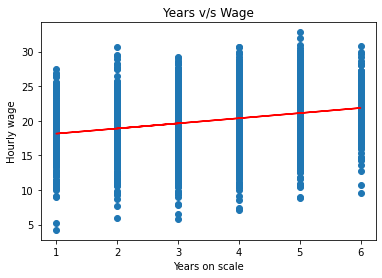

In [114]:
# plot hourly wage vs yrsscale
x = data.iloc[:,2:3].values
y = data.iloc[:,-1].values

# rehsaping to be a 2d array
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

# create an empty linear regression model 
yrs_model = LinearRegression()

# to create the model, we use fit(x,y)
yrs_model.fit(x,y)

# using linear regression predicting y using x
y_pred = yrs_model.predict(x)

# plot
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'r')
plt.title('Years v/s Wage')
plt.xlabel('Years on scale')
plt.ylabel('Hourly wage')

Text(0, 0.5, 'Hourly wage')

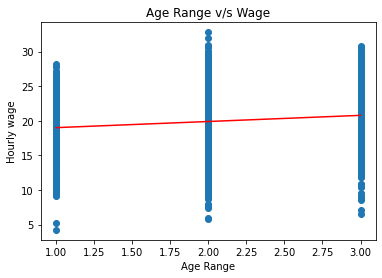

In [115]:
# plot hourly wage vs age range
x = data.iloc[:,1:2].values
y = data.iloc[:,-1].values

# reshaping to be a 2d array
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

# create an empty linear regression model 
age_model = LinearRegression()

# to create the model, we use fit(x,y)
age_model.fit(x,y)

# using linear regression predicting y using x
y_pred = age_model.predict(x)

# plot
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'r')
plt.title('Age Range v/s Wage')
plt.xlabel('Age Range')
plt.ylabel('Hourly wage')

Text(0, 0.5, 'Hourly wage')

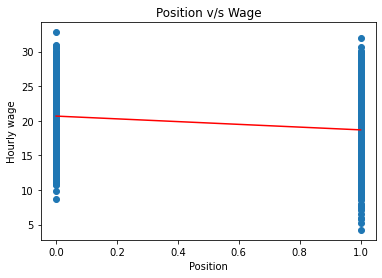

In [116]:
# plot hourly wage vs position
x = data.iloc[:,0].values
y = data.iloc[:,-1].values

# reshaping to be a 2d array
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

# create an empty linear regression model 
pos_model = LinearRegression()

# to create the model, we use fit(x,y)
pos_model.fit(x,y)

# using linear regression predicting y using x
y_pred = pos_model.predict(x)

# plot
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'r')
plt.title('Position v/s Wage')
plt.xlabel('Position')
plt.ylabel('Hourly wage')

In [117]:
# Multiple linear regression model
# selecting dependent as y and independents as x
X = data.iloc[:,[0,1,2]].values
y = data.iloc[:,-1].values

# reshaping to be a 2d array
y = y.reshape(-1, 1)
X = X.reshape(-1, 3)

# create an empty linear regression model like below and give it a good variable name
wage_model = LinearRegression()

# to create the model, we use fit(x,y)
wage_model.fit(X,y)

LinearRegression()

In [118]:
from sklearn.model_selection import train_test_split

# spliting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle = True)

# comparing test and train sets
X_train[0:30]
X_test[0:30]
y_train[0:30]
y_test[0:30]

array([[19.18],
       [26.81],
       [22.98],
       [23.45],
       [20.19],
       [21.77],
       [21.5 ],
       [19.82],
       [18.53],
       [16.45],
       [22.32],
       [15.63],
       [23.14],
       [27.67],
       [23.77],
       [13.  ],
       [23.29],
       [15.95],
       [16.47],
       [21.81],
       [21.86],
       [19.86],
       [24.37],
       [25.35],
       [18.61],
       [21.85],
       [15.49],
       [22.03],
       [11.11],
       [18.02]])

All of the test and training sets seem to have ok distribution this may be because i used shuffle = true when splitting the sets.

In [119]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([[22.01104746],
       [20.324352  ],
       [20.324352  ],
       [19.96913066],
       [20.324352  ]])

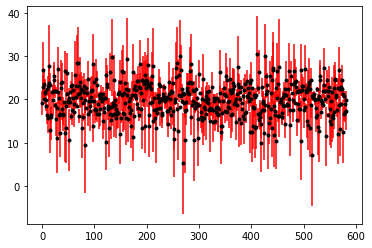

In [120]:
# plot error graph
plt.errorbar(range(len(X_test)), y_test, yerr=(y_test-predictions).flatten(), fmt='.k', ecolor="red");

In [121]:
# root mean squared error score quite low so doesnt fit observations well
print ("Score:", model.score(X_test, y_test))

Score: 0.11998507083617538


In [122]:
print('Coefficients: \n', wage_model.coef_)

Coefficients: 
 [[-2.01949099 -0.22559064  0.82398816]]


While years on scale has a positive effect on wage, the other two dont and in fact they have oposite relationships with wage and it shows that you earn more on average in the hospital than office.